In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import lib_subspaces as lsub

In [5]:
cd ~/drive2/HPT/inlet_turb_study/HPT_LS05_DOM30_TI20/Subspaces/

/media/drive2/HPT/inlet_turb_study/HPT_LS05_DOM30_TI20/Subspaces


In [6]:
blocks=range(1,5)

start_TS=5555101
stop_TS= 5595101
inc_TS=500
steps=range(start_TS,stop_TS,inc_TS)
tau_w=lsub.subspace('BL_WALL_SH',12,start_TS,blocks,source_folder='./')
tau_w.load_grid()
tau_w.load_data(steps)

The dataset requires 229.941406 Mb of RAM


In [46]:
sim_ts=2.1*10**(-5)
dt=inc_TS*sim_ts
f_sub=1./dt
nsteps=len(steps)
print 'number of steps in Subspaces: %i'%nsteps

number of steps in Subspaces: 80


# Compute histogram

In [7]:
levs=np.logspace(0,2.3,num=9)
norml = matplotlib.colors.BoundaryNorm(levs, 256)

In [8]:
max_val=0.15
tau_w_hist=np.empty([100,672+383])
j=50
bl=0
for j in range(672):
    a=np.histogram(-tau_w.data[2][0,:,0,j,:],range=(-0.01,max_val),bins=100,density=True)
    tau_w_hist[:,j]=a[0]
for j in range(1,384):  
    a=np.histogram(-tau_w.data[3][0,:,0,j,:],range=(-0.01,max_val),bins=100,density=True)
    tau_w_hist[:,j+671]=a[0]    
bins=a[1]

In [9]:

intv=bins[:-1]+(max_val+0.01)/100.
l=np.concatenate([tau_w.grid[2][0,0,:,0],tau_w.grid[3][0,0,1:,0]])
print l
X,Y=np.meshgrid(l,intv)

[ 0.0691998   0.07038764  0.07157971 ...,  0.99936265  0.99967808  1.        ]


<IPython.core.display.Javascript object>


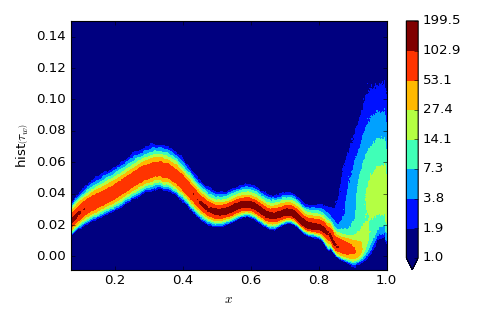

In [10]:
plt.figure(figsize=(6,4))
plt.contourf(X,Y,tau_w_hist+0.01,levels=levs,norm=norml,extend='min')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('hist$\left(\\tau_w\\right)$')
plt.tight_layout()
plt.savefig('../hist_tau_TI20_LS05.pdf')

# Spectra

## 1D PSD

In [20]:
import spectral_functions as sf

In [23]:
sf.spectral_func?

In [69]:
max_val=0.15
nfft=80
nz=10
tau_w_psd=np.zeros([nfft/2+1,672+383])
for j in range(672):
    a=np.zeros(nfft/2+1)
    for nz in range(0,384,2):
        a+=sf.spectral_func(-tau_w.data[2][0,:,0,j,nz],-tau_w.data[2][0,:,0,j,nz],Fs=f_sub,NFFT=nfft,scale='spectrum')
    tau_w_psd[:,j]=a
for j in range(1,384):  
    a=np.zeros(nfft/2+1)
    for nz in range(0,384,2):
        a+=sf.spectral_func(-tau_w.data[3][0,:,0,j,nz],-tau_w.data[3][0,:,0,j,nz],Fs=f_sub,NFFT=nfft,scale='spectrum')
    tau_w_psd[:,j+671]=a    
frq=sf.get_freqs(-tau_w.data[2][0,:,0,j,0],NFFT=nfft,Fs=f_sub)

In [70]:
Xs,Ys=np.meshgrid(l,frq)
print frq

[  0.           1.19047619   2.38095238   3.57142857   4.76190476
   5.95238095   7.14285714   8.33333333   9.52380952  10.71428571
  11.9047619   13.0952381   14.28571429  15.47619048  16.66666667
  17.85714286  19.04761905  20.23809524  21.42857143  22.61904762
  23.80952381  25.          26.19047619  27.38095238  28.57142857
  29.76190476  30.95238095  32.14285714  33.33333333  34.52380952
  35.71428571  36.9047619   38.0952381   39.28571429  40.47619048
  41.66666667  42.85714286  44.04761905  45.23809524  46.42857143
  47.61904762]


In [71]:
levs=np.logspace(-6,-1,num=11)
norml = matplotlib.colors.BoundaryNorm(levs, 256)

<IPython.core.display.Javascript object>


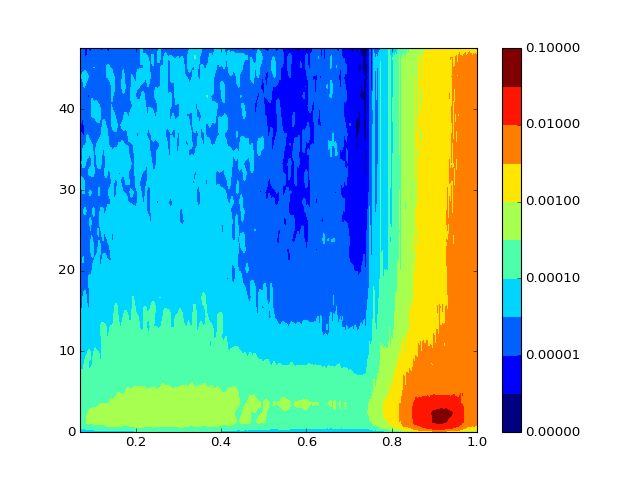

In [72]:
plt.figure()
plt.contourf(Xs,Ys,tau_w_psd,levels=levs,norm=norml)
plt.colorbar()

In [ ]:
max_val=0.15
tau_w_hist=np.empty([256,672+383])
j=50
bl=0
for j in range(672):
    a=np.histogram(-tau_w.data[2][0,:,0,j,:],range=(-0.01,max_val),bins=100,density=True)
    tau_w_hist[:,j]=a[0]
for j in range(1,384):  
    a=np.histogram(-tau_w.data[3][0,:,0,j,:],range=(-0.01,max_val),bins=100,density=True)
    tau_w_hist[:,j+671]=a[0]    
bins=a[1]